# Exploratory Data Analysis

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.

### High-level steps covered:

- Know the domain knowledge [DEMO - WALKTHRU]
- Start with basics: get a feeling of the data [DEMO - WALKTHRU]
- Check descriptive statistics [DEMO - WALKTHRU]
- Plot distribution of features [DEMO - WALKTHRU]
- Check correlations between features, with target column [DEMO - WALKTHRU]
- Find issues (missing values, duplicated rows)

Steps suggested by [Machine Learning Master: Understand Your Machine Learning Data With Descriptive Statistics in Python](https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python/):
- Peek at Your data
- Dimensions of Your Data
- Data Type For Each Attribute
- Descriptive Statistics
- Class Distribution (Classification Only)
- Correlation Between Attributes
- Skew of Univariate Distributions

### Resources 

- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Notebook on Boston Housing dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)
- **[Useful cheatsheets](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/README-details.md#cheatsheets)**

#### Visualisation:

- [Fundamentals of Data Visualization](https://serialmentor.com/dataviz/)
- [Visualize Machine Learning Data in Python With Pandas](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
- [Python Data Science Notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)

#### Notebooks exploring the ML workflow (start-to-finish):

- [Learn Machine Learning in a Weekend: Day 1: Regression](https://colab.research.google.com/drive/19uoDyGAxJ0zCwPT6cNb1xkYOfySNZChV#scrollTo=P8BmebTwGIhS)
- [Learn Machine Learning in a Weekend: Day 2: Classification](https://colab.research.google.com/drive/1i-fOhU87wWrzgnTV0o54MQyHmRVJK0qt#scrollTo=cy6gO2H7oL3E)


Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

### Domain knowledge

Ask all the questions you should ask with regards to the domain and related domains or sub-domains.

It is a good idea to know the **why** part of the action, why are we doing what we are doing with the data, see the [five whys](https://en.wikipedia.org/wiki/5_Whys).

Some ideas (of course, please come up with your own as well):

- We want to solve a problem in the end, with ML, and have good results. If we don’t understand our data, we might not be able to train a model because of incoherent or missing data, or have poor results because we have misleading (unbalanced, highly correlated, too many useless features) data. Thus we need to find out if there are incoherent/missing/misleading data
- Black box: if anything wrong, if we don’t understand our data, we won’t be able to correct it
- If you don’t have domain knowledge, you risk wasting time on finding the root causes of issues. 
- When I work with someone, I want to get to know that person to get the best out of your relationship
- Know the nature / boundaries / source of the data




### Start with basics: get a feeling of the data


#### Load Your Data [DEMO - WALKTHRU]

In [1]:
%%bash
if [[ ! -s boston_housing_dataset.zip ]]; then
    curl -O -L https://github.com/neomatrix369/awesome-ai-ml-dl/releases/download/v0.1/boston_housing_dataset.zip
fi

unzip -o boston_housing_dataset.zip

Archive:  boston_housing_dataset.zip
  inflating: column.header           
  inflating: housing-unclean.csv     
  inflating: housing.csv             
  inflating: housing.names           


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   617    0   617    0     0   1952      0 --:--:-- --:--:-- --:--:--  1958
100 27820  100 27820    0     0  26394      0  0:00:01  0:00:01 --:--:--  249k


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set()

names = [line.strip() for line in open("column.header", 'r')]
data = pd.read_csv("housing-unclean.csv", names=names)

print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns hous

####  Get familiar with columns [DEMO - WALKTHRU]
Go through the dataset description. Have some thoughts about which features might be related, what meaning they have, what impact they might have on target variable.
>>
- Medv is our price that we will try to predict
- Some information about type of area (residential / industrial), former has probably a positive impact to price contrary to latter.
- Those features about criminality, nitric oxides (pollution?), LSTAT (social class?) should have a negative impact.
- etc...

####  Dimensions of Your Data [DEMO - WALKTHRU]
Have a very good handle on how much data you have, both in terms of rows and columns.

In [3]:
shape = data.shape
print("(rows, columms) = ", shape)

(rows, columms) =  (606, 14)


Rows: 
-       too few rows mean you might not have enough data for your algoritms to train
-       too many rows mean your training process will take long

Columns / features:
-       too few columns/features again will have an impact on generalising or usefulness of the model
-       too many columns/featurs could cause training performance to suffer, and does not mean better accuracy


#### Peek at Your Data [DEMO - WALKTHRU]
Looking at the raw data can reveal insights that you cannot get any other way.

Subsets of data from the head or tail of the dataset can be helpful.

In [4]:
peek = data.head(10)
print(peek)
print()
print("The first column lists the row number, which is handy for referencing a specific observation.")

      crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

#### Data Type For Each Attribute

It's important to know the column attributes, since string values may need to be converted to floating point values or integers to represent categorical or ordinal values. If all of them are numbers they will still need to be standardised or normalised.

_Best to list all the attributes of the dataset._

In [5]:
types = data.dtypes
print(types)

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


> We have only numeric data, and should not have missing data (with NaN)

#### Other attributes of the data


In [6]:
print("Names of columns", data.columns)   # column names (which is “an index”)
print()
print("Overview of values as an array", data.values)    # underlying numpy array — df are stored as numpy arrays for effeciencies.
print()

Names of columns Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Overview of values as an array [[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [3.3147e-01 0.0000e+00 6.2000e+00 ... 3.7895e+02 3.9500e+00 4.8300e+01]
 [5.3720e-02 0.0000e+00 1.3920e+01 ... 3.9285e+02 7.3900e+00 2.7100e+01]
 [4.4620e-02 2.5000e+01 4.8600e+00 ... 3.9563e+02 7.2200e+00 2.3900e+01]]



### Check descriptive statistics [DEMO - WALKTHRU]

Descriptive statistics can give you great insight into the shape of each attribute.

 -  Count
 -  Mean
 -  Standard Devaition
 -  Minimum Value
 -  25th Percentile
 -  50th Percentile (Median)
 -  75th Percentile
 -  Maximum Value

In [7]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print()
print("It is worth taking some time and reviewing observations from the results.")
print("This might include the presence of “NA” values for missing data or surprising distributions for attributes.")
data.describe()


It is worth taking some time and reviewing observations from the results.
This might include the presence of “NA” values for missing data or surprising distributions for attributes.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,554.000,560.000,606.000,555.000,606.000,606.000,587.000,606.000,571.000,589.000,606.000,606.000,606.000,606.000
mean,3.480,11.763,11.155,0.070,0.554,6.290,68.535,3.774,9.378,407.353,18.453,358.054,12.594,22.737
std,8.325,23.839,6.844,0.256,0.115,0.736,28.365,2.096,8.617,167.878,2.176,87.908,7.148,9.516
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.080,0.000,5.190,0.000,0.449,5.879,43.100,2.100,4.000,280.000,17.400,374.835,6.905,16.800
50%,0.254,0.000,9.690,0.000,0.538,6.208,77.800,3.191,5.000,330.000,19.000,391.440,11.395,21.200
75%,3.520,13.750,18.100,0.000,0.624,6.630,94.100,5.118,24.000,666.000,20.200,396.295,16.955,25.975
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


>>
- crim zn have a negatively skewed distribution while b has positively skewed distribution
- crim zn age  are indeed percentages from 0 to 100


### Plot distribution of features [DEMO - WALKTHRU]

/home/jeremie/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jeremie/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


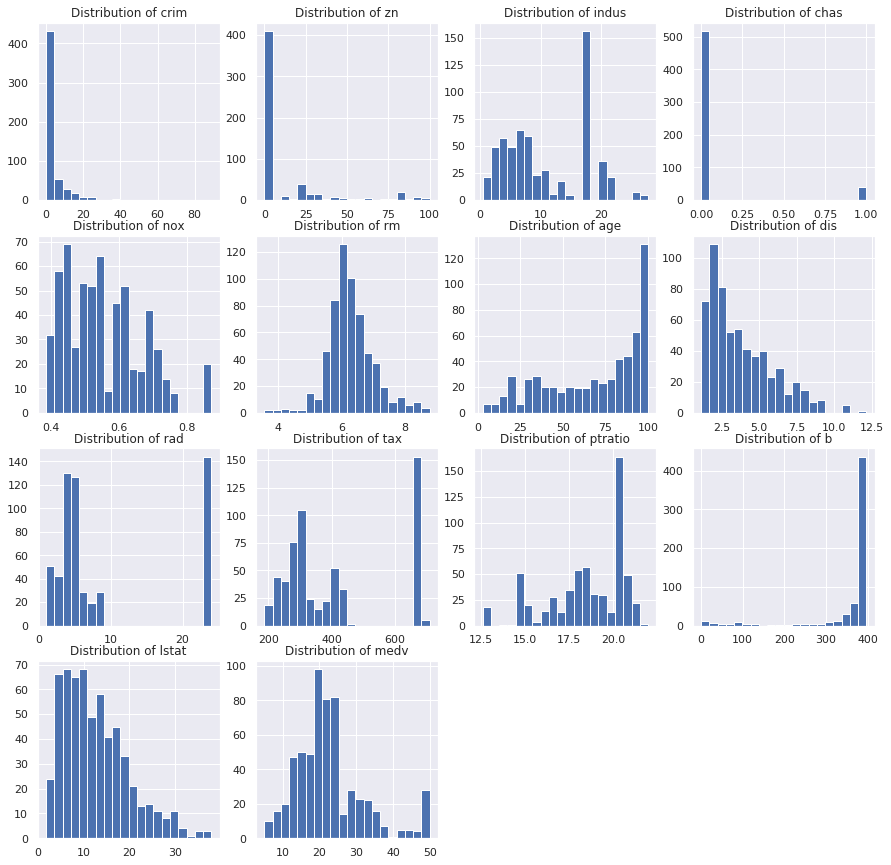

In [8]:
plot_index=1
max_plots=4
for column in data.columns: 
    axes = plt.subplot(4, max_plots, plot_index)
    axes.set_title('Distribution of '+ column)
    axes.figure.set_figheight(15)
    axes.figure.set_figwidth(15)
    axes.figure.set_tight_layout(False)
    plt.hist(data[column],bins=20)
    plot_index=plot_index+1

>>
- the gaps in rad, tax are surprising. are they related ? far away castles ?
- confirmations on distributions observed previously
- most suburbs have no criminality, that's reassuring!

#### Class Distribution (Classification Only)
On classification problems you need to know how balanced the class values are.

In [9]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2


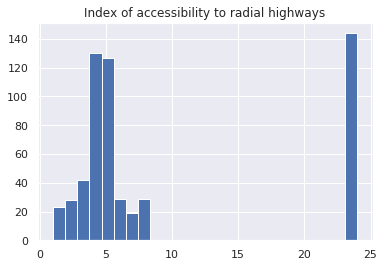


We see a nice clustering of instances into two groups.
One group between 'rad' index range of 1 and 8, and a second group at 24.
From the map it appears that the houses bounded by the river may not have immediate access to the radial highways.
This is an interesting subject for further analysis.


In [10]:
class_counts = pd.value_counts(data["rad"])
# print(class_counts)
plt.hist(data["rad"], bins=25)
plt.title('Index of accessibility to radial highways')
plt.show()

print()
print("We see a nice clustering of instances into two groups.")
print("One group between 'rad' index range of 1 and 8, and a second group at 24.")
print("From the map it appears that the houses bounded by the river may not have immediate access to the radial highways.")
print("This is an interesting subject for further analysis.")

#### Histogram for numeric data

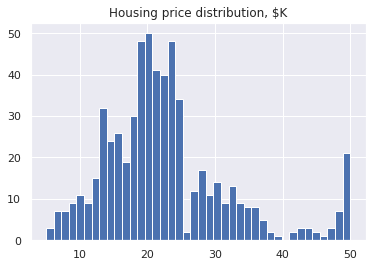

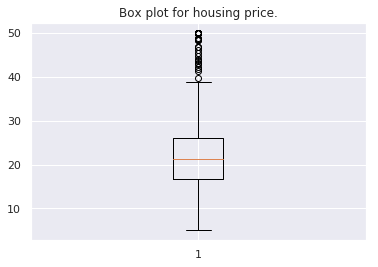

In [11]:
# we can plot a histogram in a slightly different way 
plt.hist(data["medv"], bins = 40)
plt.title('Housing price distribution, $K')
plt.show()

# and the same for the boxplot
plt.boxplot(data["medv"])
plt.title('Box plot for housing price.')
plt.show()

#### Bar chart for categories

515
0.0    516
1.0     39
Name: chas, dtype: int64


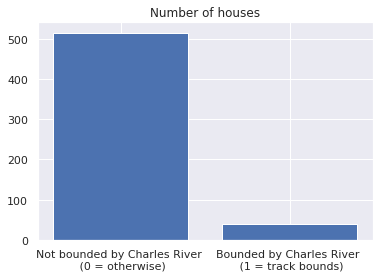

In [12]:
print(data[data["chas"] == 0].count()[0])

class_counts = pd.value_counts(data["chas"])
print(class_counts)
labels=["Not bounded by Charles River \n (0 = otherwise)", "Bounded by Charles River \n (1 = track bounds)", ]
plt.bar(labels, class_counts)
plt.title('Number of houses')
plt.show()

#### Box whisker / violin plots for category data vs numeric

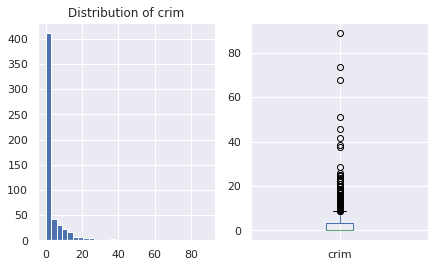

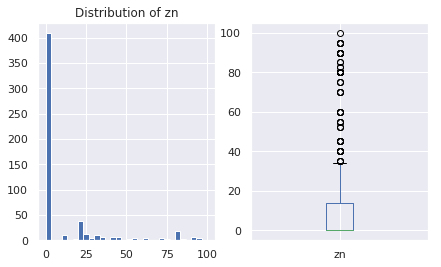

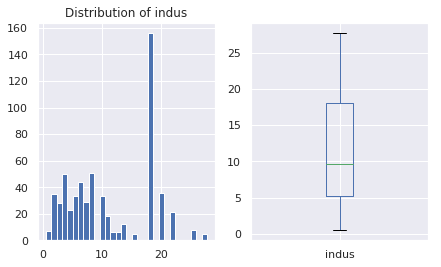

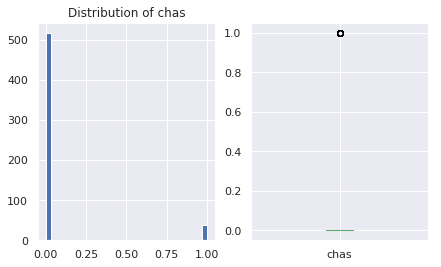

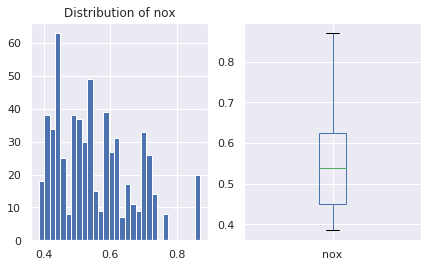

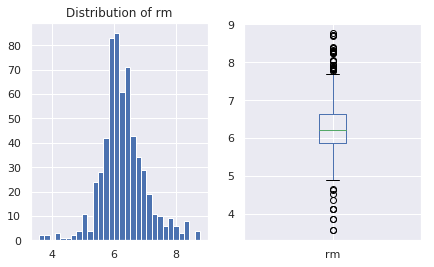

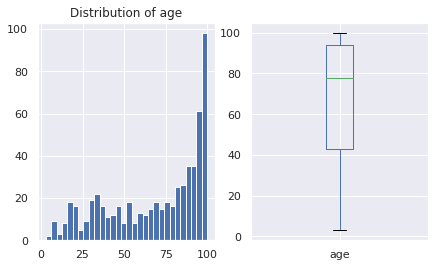

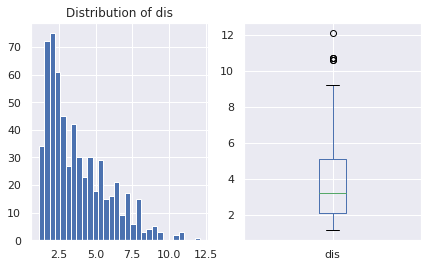

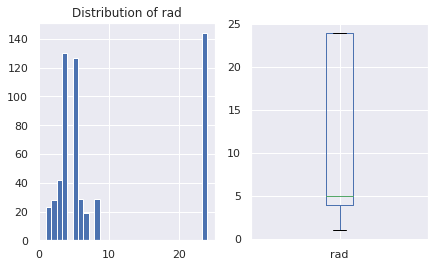

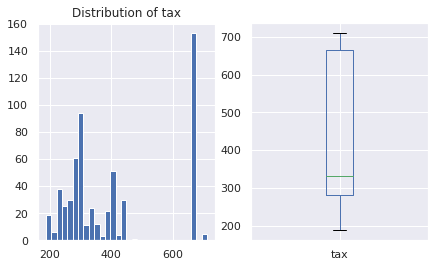

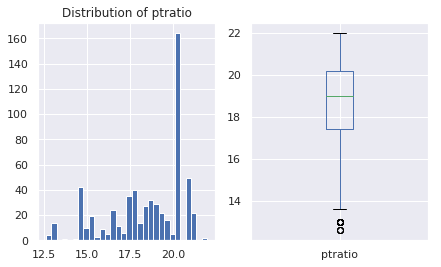

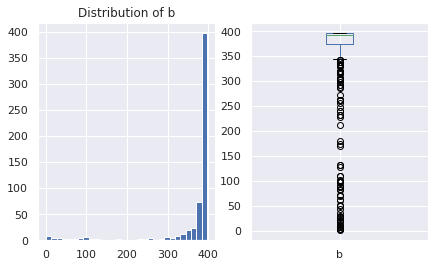

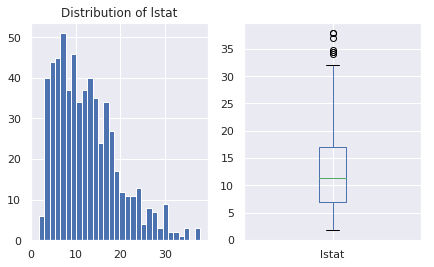

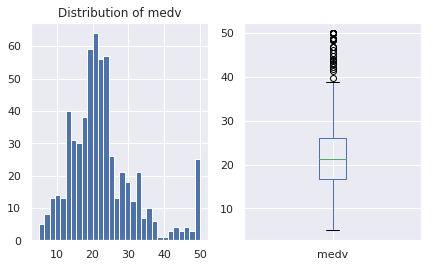

In [13]:
# we loop through all the columns
for col in data.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(7, 4))
    # our first chart is a histogram and we set the title 
    data[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    data.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

### Check correlations

#### Scatter charts for numeric data [DEMO - WALKTHRU]

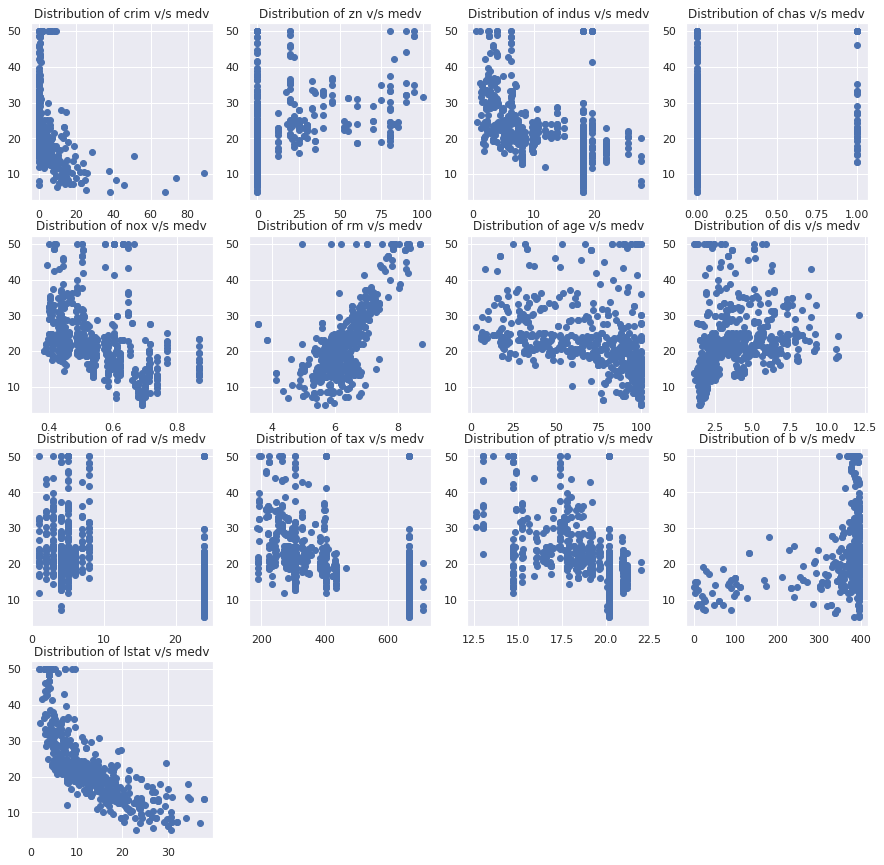

In [14]:
plot_index=1
max_plots=4
for column in data.columns: 
  if column != "medv":
      axes = plt.subplot(4, max_plots, plot_index)
      axes.set_title('Distribution of '+ column + " v/s medv")
      axes.figure.set_figheight(15)
      axes.figure.set_figwidth(15)
      axes.figure.set_tight_layout(False)
      plt.scatter(data[column], data["medv"], marker='o')
      plot_index=plot_index+1

>>
we can already see multiple obvious correlations between each feature and the price.

>>
some linear:
- nb of rooms

>>
more complex:
- criminality 
- proportion of non retail businesses
- percentage of lower status of the population

>> 
some with no correlation:
- age: proportion of owner occupied units built prior to 1940
- rad: index of accessibility to radial highways
>>
etc

#### Correlation Between Attributes [DEMO - WALKTHRU]

Correlation refers to the relationship between two variables and how they may or may not change together.

          crim     zn  indus       chas    nox     rm    age    dis        rad    tax  ptratio  \
crim     1.000 -0.202  0.414 -5.020e-02  0.426 -0.231  0.354 -0.382  6.295e-01  0.588    0.292   
zn      -0.202  1.000 -0.537 -5.647e-02 -0.517  0.310 -0.574  0.673 -3.151e-01 -0.315   -0.408   
indus    0.414 -0.537  1.000  8.199e-02  0.765 -0.399  0.639 -0.710  5.918e-01  0.718    0.390   
chas    -0.050 -0.056  0.082  1.000e+00  0.112  0.100  0.109 -0.119  2.582e-04 -0.023   -0.128   
nox      0.426 -0.517  0.765  1.124e-01  1.000 -0.319  0.731 -0.771  6.002e-01  0.667    0.192   
rm      -0.231  0.310 -0.399  9.996e-02 -0.319  1.000 -0.248  0.206 -2.103e-01 -0.317   -0.377   
age      0.354 -0.574  0.639  1.086e-01  0.731 -0.248  1.000 -0.753  4.494e-01  0.500    0.285   
dis     -0.382  0.673 -0.710 -1.189e-01 -0.771  0.206 -0.753  1.000 -4.922e-01 -0.536   -0.248   
rad      0.629 -0.315  0.592  2.582e-04  0.600 -0.210  0.449 -0.492  1.000e+00  0.912    0.454   
tax      0.588 -0.31

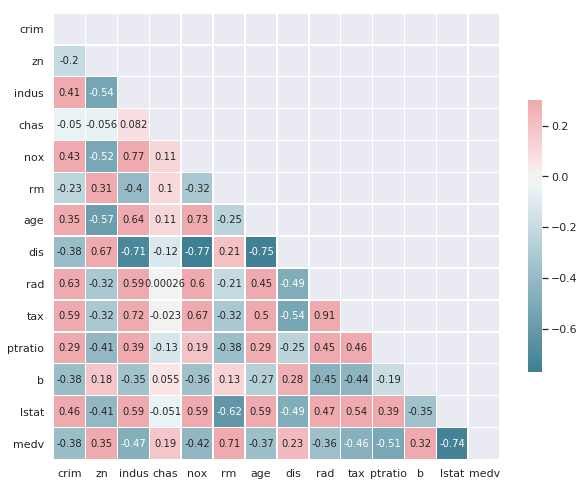

In [15]:
# Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)
print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
# correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(correlations, annot=True,mask=mask, cmap=cmap)

The features with high correlations should not be used together in case of some models (linear regression): dis and nox, tax and rad 

### Find issues

#### Count missing values

Count the number of missing values across all the columns

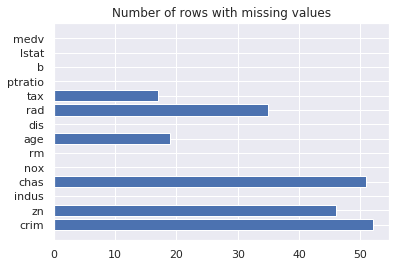

In [16]:
total_rows = data.shape[0]
total_rows_without_missing_values = data.count()
missing_values_count=(total_rows - total_rows_without_missing_values)

plt.barh(data.columns, missing_values_count)
plt.title("Number of rows with missing values")
plt.show()

#### Count occurrence of values per column

Count the number times each value in a column is occurring across the whole dataset

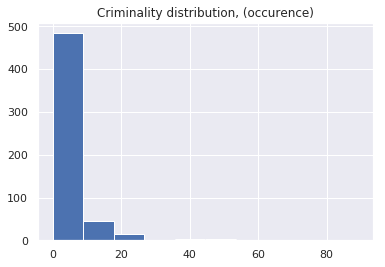

Print the count for other columns as well, maybe even plot them on a bar chart / histogram


In [17]:
plt.hist(data["crim"], bins = 10)
plt.title('Criminality distribution, (occurence)')
plt.show()

print("Print the count for other columns as well, maybe even plot them on a bar chart / histogram")

#### Count number of unique values per column

Count the number unique values in a column occurring across the whole dataset

In [18]:
data.ptratio.nunique()

46

#### Duplicated rows
Get stats on the number of non-unqiue or duplicate rows in a dataset

% of duplicated rows to total rows in the dataset: 8.25082508250825



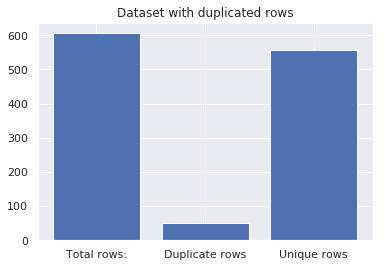

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
556,0.142,0.0,10.01,0.0,0.547,6.254,84.2,2.256,6.0,432.0,17.8,388.74,10.45,18.5
557,0.841,0.0,8.14,0.0,0.538,5.599,85.7,4.455,4.0,307.0,21.0,303.42,16.51,13.9
558,0.037,20.0,3.33,0.0,0.443,6.968,37.2,5.245,5.0,216.0,14.9,392.23,4.59,35.4
559,0.140,22.0,5.86,0.0,0.431,6.487,13.0,7.397,7.0,330.0,19.1,396.28,5.90,24.4
560,0.298,0.0,6.20,0.0,0.504,7.686,17.0,3.375,8.0,307.0,17.4,377.51,3.92,46.7
561,3.321,0.0,19.58,1.0,0.871,5.403,100.0,1.322,5.0,403.0,14.7,396.90,26.82,13.4
562,0.140,0.0,8.56,0.0,0.520,6.167,90.0,2.421,5.0,384.0,20.9,392.69,12.33,20.1
563,0.053,0.0,3.41,0.0,0.489,7.079,63.1,3.414,2.0,270.0,17.8,396.06,5.70,28.7
564,6.444,0.0,18.10,0.0,0.584,6.425,74.8,2.200,24.0,666.0,20.2,97.95,12.03,16.1
565,1.388,0.0,8.14,0.0,0.538,5.950,82.0,3.990,4.0,307.0,21.0,232.60,27.71,13.2


In [19]:
total_rows_count = data.shape[0]
duplicated_rows_count = data[data.duplicated()].shape[0]
print("% of duplicated rows to total rows in the dataset:", duplicated_rows_count / total_rows_count * 100)
print()

labels = ("Total rows:", "Duplicate rows", "Unique rows")
values = (total_rows_count, duplicated_rows_count, total_rows_count - duplicated_rows_count)
plt.title("Dataset with duplicated rows")
plt.bar(labels, values)
plt.show()

data[data.duplicated()]

### Preparatory questions to ask

Do you know or have:

- The domain knowledge needed to understand the data. Have you done your research ?
- Where it comes from
    - Is it manually/automatically generated data or mix of both?
    - Process used to create the data
- Do you know the nature of the bias in the data ? Does it need to be reduced and can it be ?
- Do we know the strengths and weaknesses of the data ? Is the data trustworthy, dirty -> do we need to fix it ?
    - Are there outliers ? should we keep them ?
    - Are there missing data ? what should we do about them ?
- Are the data representative of the domain ?

### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.